In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<AxesSubplot:xlabel='class', ylabel='count'>

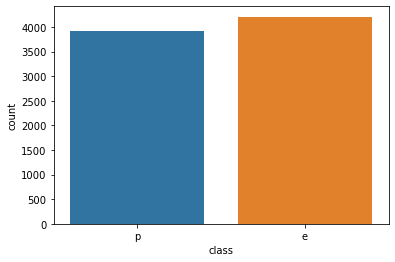

In [23]:
sns.countplot(data=df, x='class')

In [24]:
feat_unique = df.describe().transpose().reset_index().sort_values('unique')

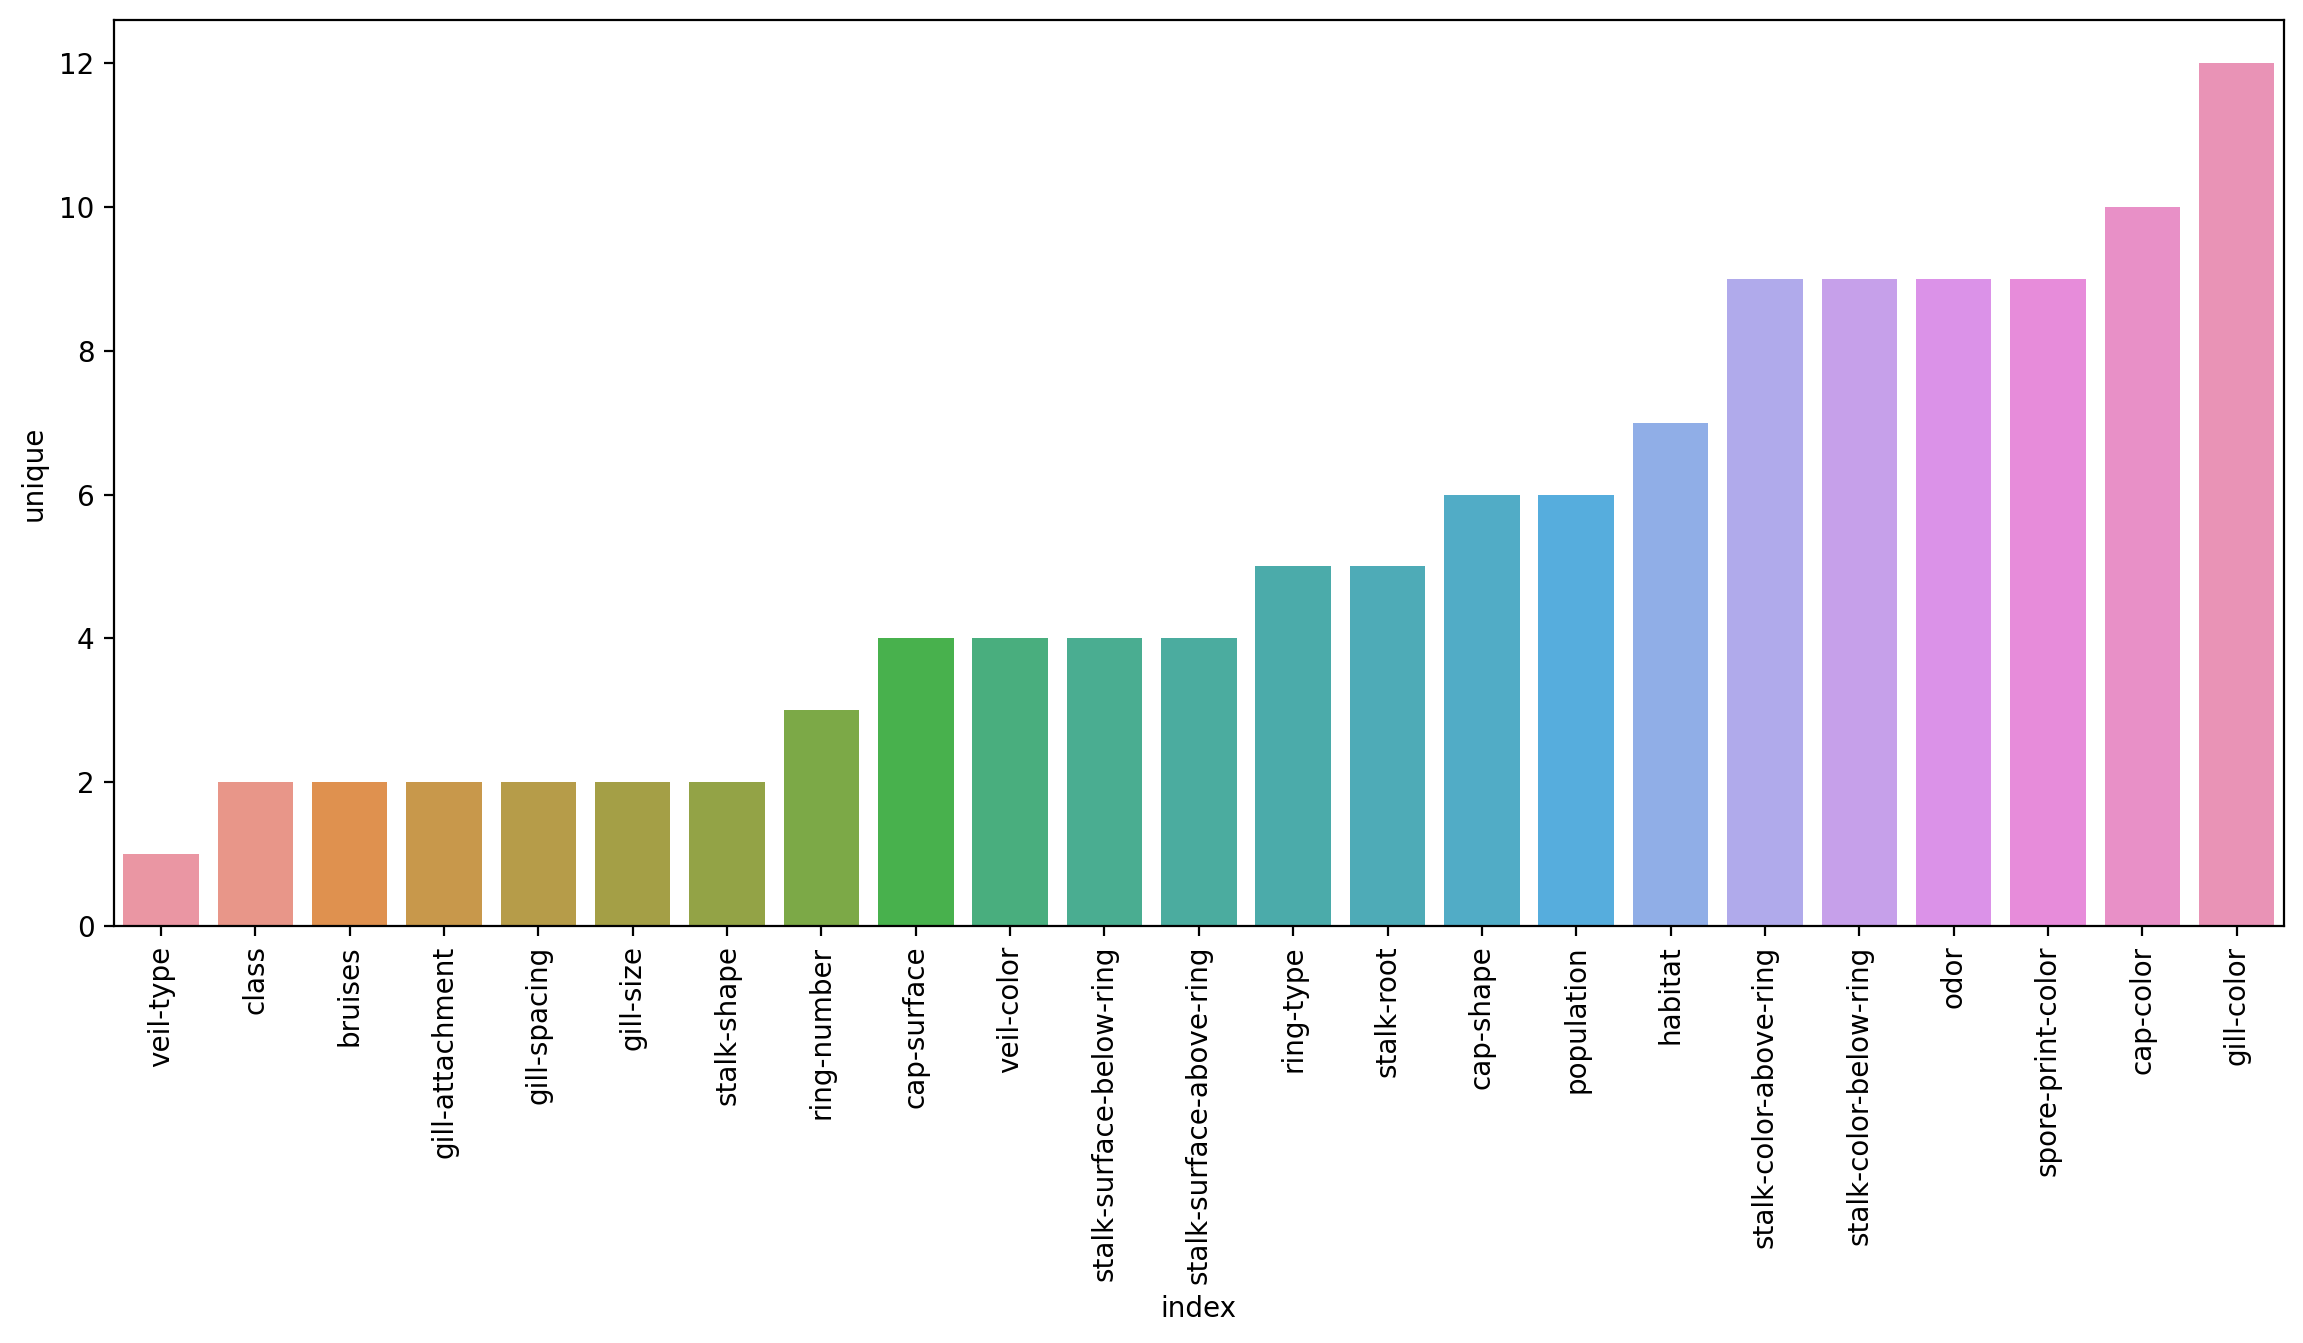

In [25]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_unique, x='index', y='unique')
plt.xticks(rotation=90);

In [26]:
X = df.drop('class', axis=1)

In [27]:
# X.isnull().sum()

In [28]:
X = pd.get_dummies(X, drop_first=True)

In [29]:
y = df['class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
model = AdaBoostClassifier(n_estimators=1)

In [35]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [39]:
predictions = model.predict(X_test)

In [40]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [42]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
model.feature_importances_.argmax()

22

In [45]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

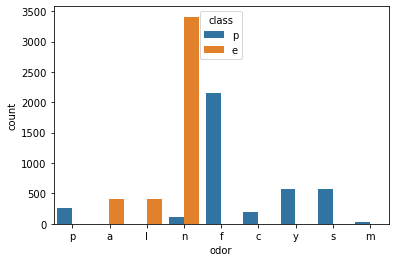

In [47]:
sns.countplot(data=df, x='odor', hue='class')

In [48]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

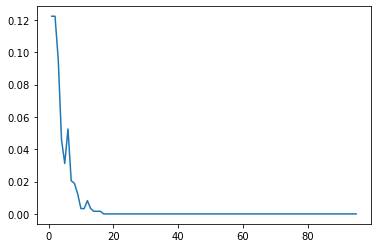

In [49]:
plt.plot(range(1, 96), error_rates)

In [52]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [53]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [54]:
imp_feats = feats[feats['Importance'] > 0]

In [55]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


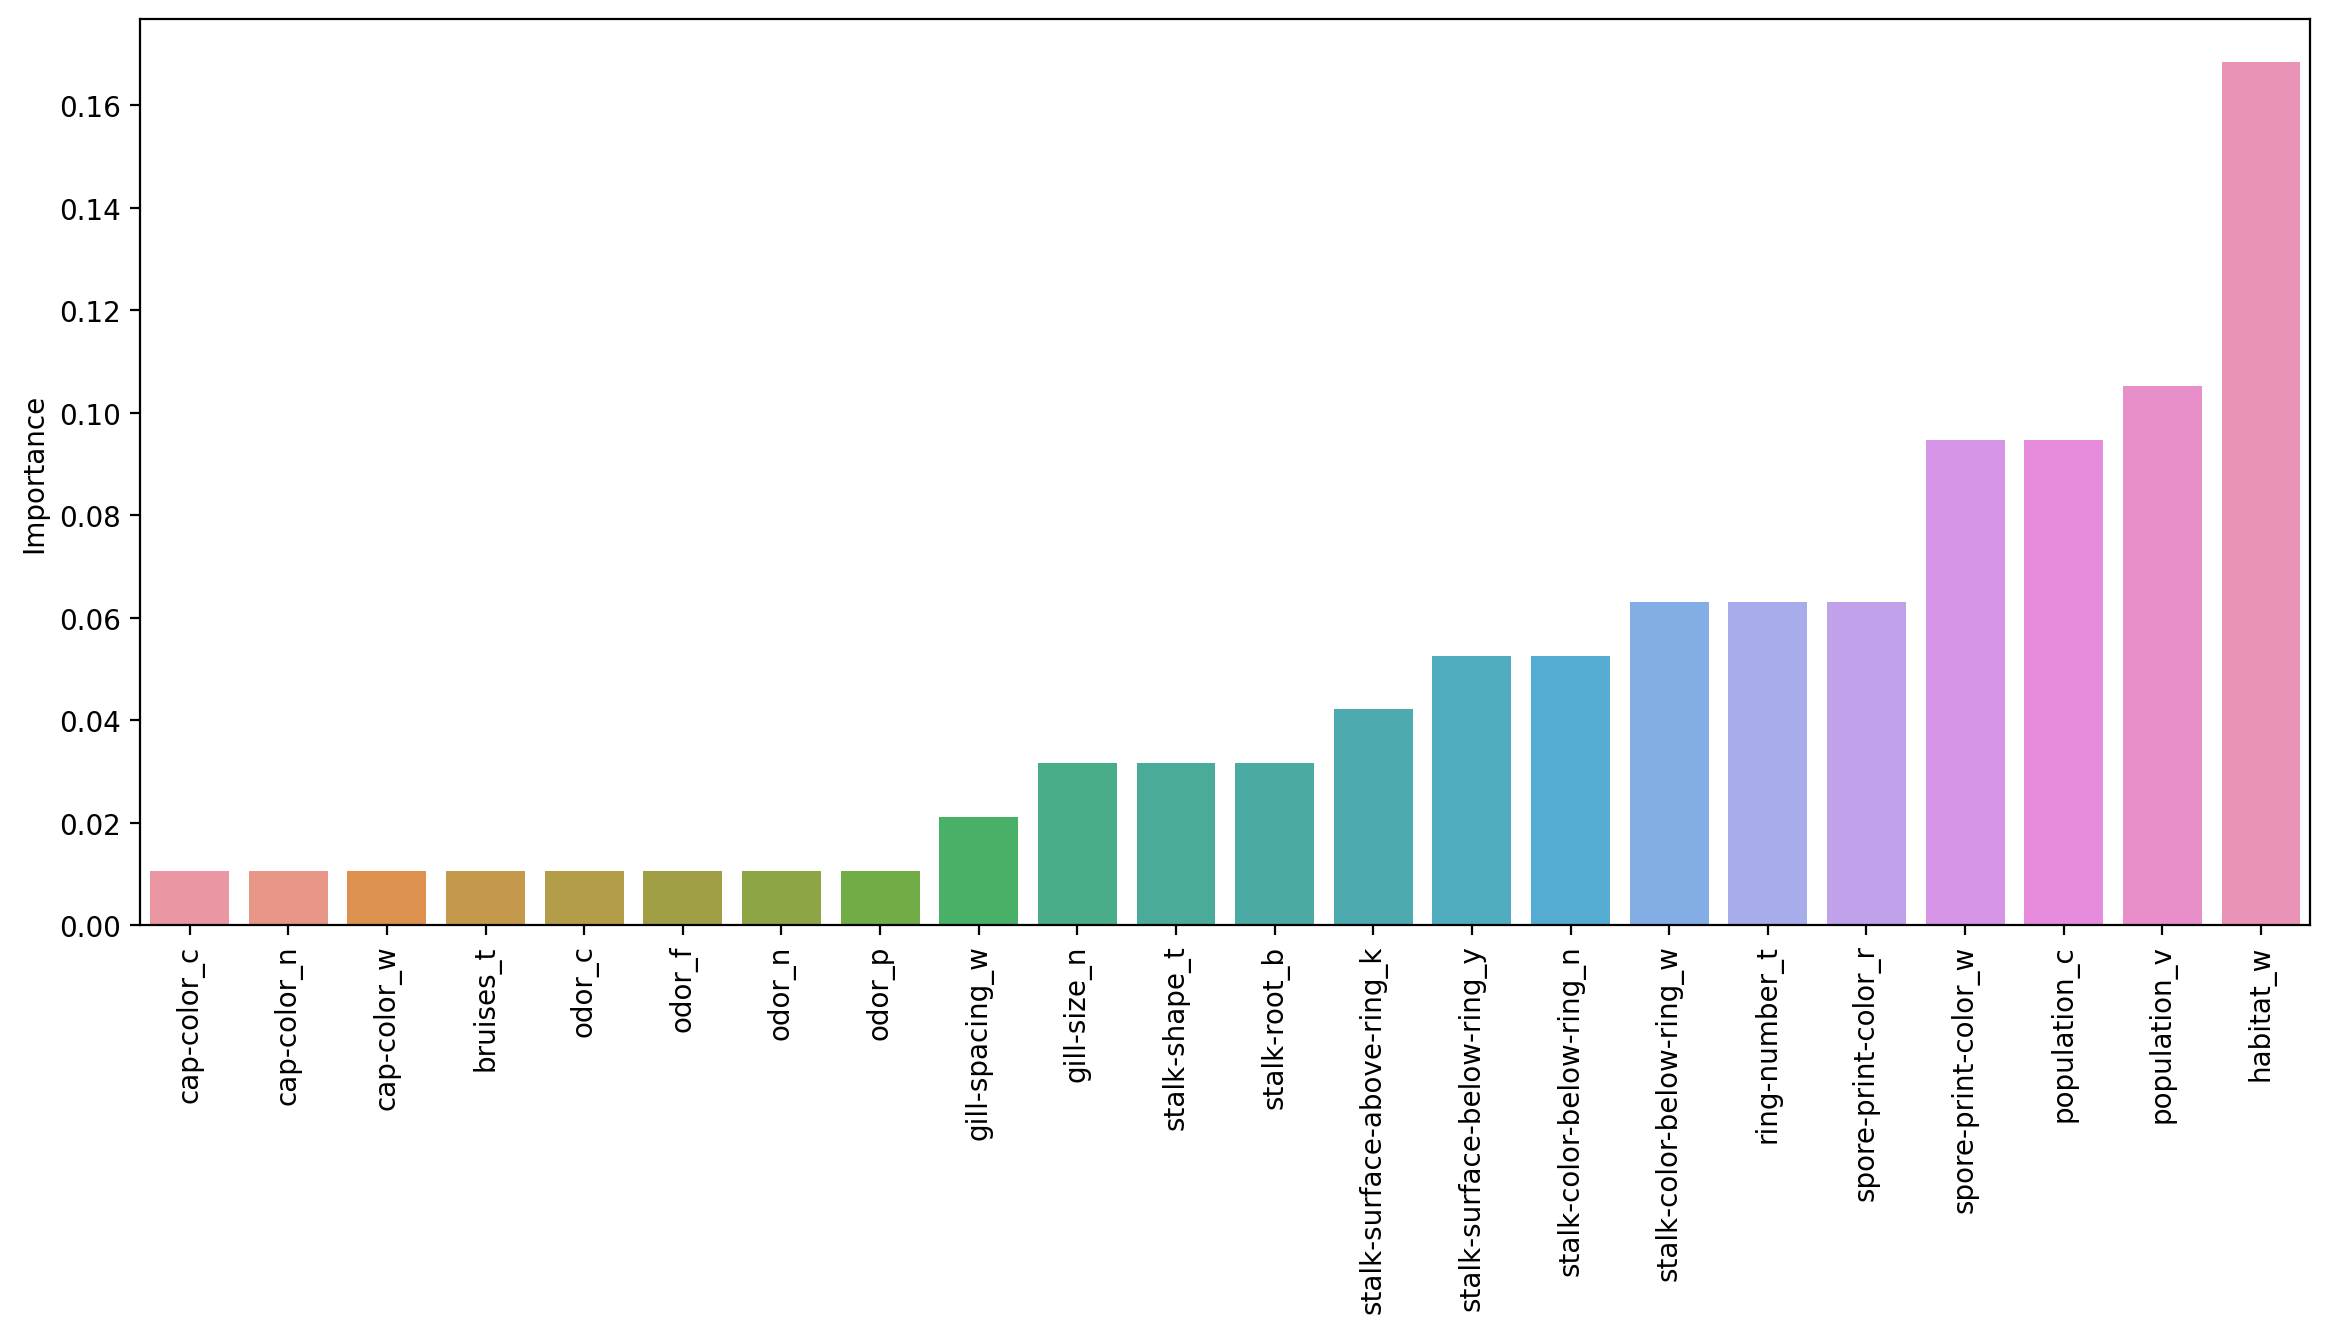

In [61]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_feats.sort_values("Importance"), x=imp_feats.index, y='Importance')
plt.xticks(rotation=90);

In [92]:
x = np.arange(1, 100)
y = 25 + 2*x + 2*x**2 + 4 * x**3 + 3 * x**4

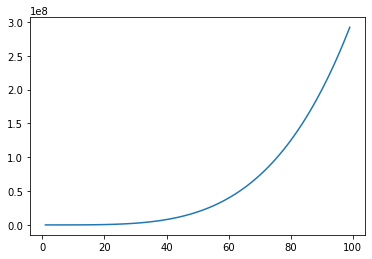

In [93]:
plt.plot(x, y)

## Gradient Boosting

In [94]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [95]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [96]:
X = df.drop("class", axis=1)

In [97]:
X = pd.get_dummies(X, drop_first=True)

In [98]:
y = df['class']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {'n_estimators':[50, 100], 
             'learning_rate':[0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5]}

In [105]:
gb_model = GradientBoostingClassifier()

In [106]:
grid = GridSearchCV(gb_model, param_grid)

In [107]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [111]:
predictions = grid.predict(X_test)

In [112]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [113]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [116]:
grid.best_estimator_

GradientBoostingClassifier()

In [117]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [118]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [120]:
# grid.best_estimator_.feature_importances_

In [121]:
feat_import = grid.best_estimator_.feature_importances_

In [123]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                       columns=['Importance'])

In [124]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,7.526581e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.097058e-16
...,...
habitat_l,0.000000e+00
habitat_m,1.787797e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [125]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

In [126]:
imp_feat

,Importance
cap-surface_g,0.001049
cap-color_y,0.002311
bruises_t,0.051669
odor_c,0.000624
odor_f,0.010208
odor_l,0.018250
odor_n,0.614763
odor_p,0.003949
gill-spacing_w,0.012509
gill-size_n,0.010395


In [130]:
imp_feat = imp_feat.sort_values('Importance')

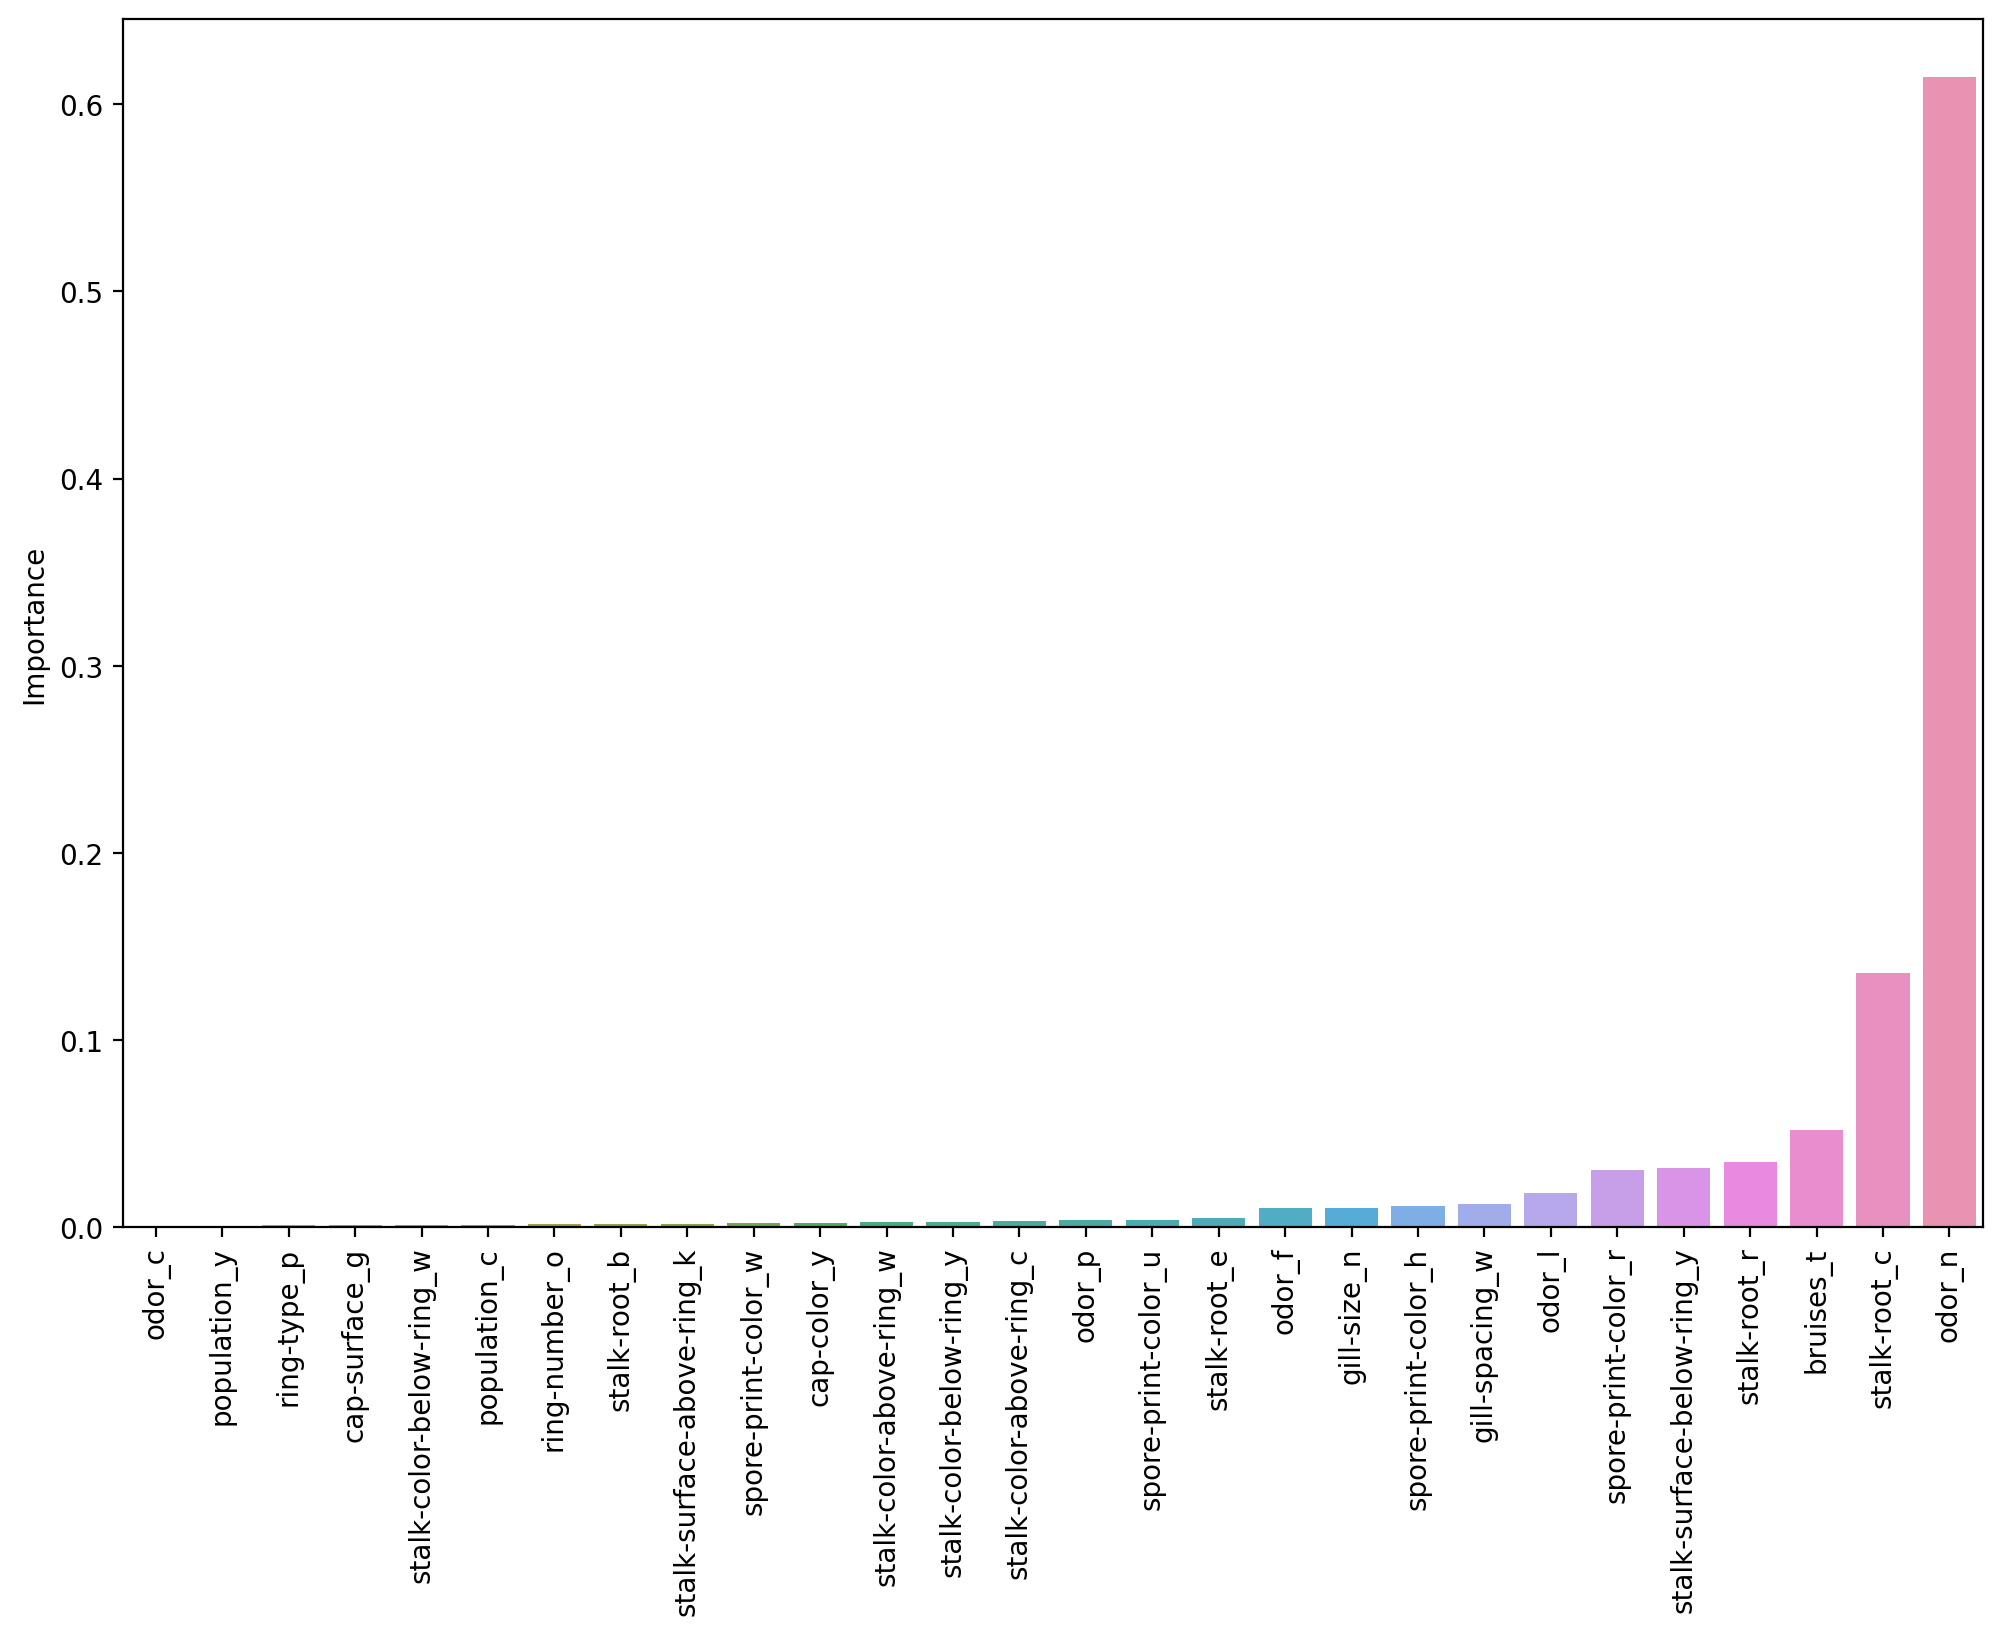

In [132]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_feat, x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);